## Importing and installing dependencies

In [ ]:
!pip install kapre==0.3.7
!pip install tensorflow==2.15.0 # SHOULD BE THIS VERSION!
!pip install librosa
!pip install soundfile

In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display

from IPython.display import Audio
from ipywidgets import interactive
from models import *

# Loading your audio file

We provided two audio files for testing, but we encourage the user to use their own to experiment with the models. If the user wants to use other files just change the name of the path on the code below

In [ ]:
moon, sr = librosa.load("moonsonata1.mp3")
Audio(moon, rate = sr)

In [ ]:
doom, sr = librosa.load("doom.mp3") # 10 second
doom_full, sr = librosa.load("doom_full.mp3") # full track
Audio(doom_full, rate = sr)

# Loading the models

Each model was trained using the same hyperparameters for the STFT and to compute the mel-spectrogram. They are listed below.
It is important to notice that on the CRNN architectures, the input shape can be diferent than the one listed, since our architecture can handle inputs of any time leght.

In [4]:
sr = 22050
input_shape = (220000,1)
n_fft = 2048 + 1024
n_mels = 1024
hop_length = n_fft//4
n_feat = 64

In [5]:
name_dict = {"blues":0,'classical':1,'country':2 , 'disco':3 , 'rock':4,
        'hiphop': 5 ,  'jazz':6,
        'pop':7 , 'reggae':8, "metal":9}

# just a dictionary with the genre names

In [6]:
# creating the model v-kernel and the number of parameters in the network
model = model_CNN_VK(sr,input_shape,n_fft,n_mels,hop_length,n_feat)

c:\Users\hugom\anaconda3\Lib\site-packages\kapre\backend.py:141: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  filterbank = librosa.filters.mel(



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 nt_melspec (Sequential)     (None, 283, 1024, 1)      0         
                                                                 
 conv1 (Conv2D)              (None, 281, 52, 64)       98368     
                                                                 
 bnorm0 (BatchNormalization  (None, 281, 52, 64)       256       
 )                                                               
                                                                 
 activation (Activation)     (None, 281, 52, 64)       0         
                                                                 
 maxpool1 (MaxPooling2D)     (None, 140, 26, 64)       0         
                                                                 
 bnorm1 (BatchNormalization  (None, 140, 26, 64)       256       
 )                                                     

In [7]:
# Creating the model BICRNN for inputs with diferent time lenght
sr = 22050
input_shape = (moon.shape[0],1)
input_shape2 = (doom_full.shape[0],1)
input_shape3 = (220000,1)
n_fft = 2048 + 1024
n_mels = 1024
hop_length = n_fft//4
n_feat = 64
model2 = model_BICRNN_VK(sr,input_shape,n_fft,n_mels,hop_length,n_feat)
model3 = model_BICRNN_VK(sr,input_shape2,n_fft,n_mels,hop_length,n_feat)
model4 = model_BICRNN_VK(sr,input_shape3,n_fft,n_mels,hop_length,n_feat)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 nt_melspec (Sequential)     (None, 10323, 1024, 1)    0         
                                                                 
 conv1 (Conv2D)              (None, 10323, 4, 64)      262208    
                                                                 
 bnorm0 (BatchNormalization  (None, 10323, 4, 64)      256       
 )                                                               
                                                                 
 activation_5 (Activation)   (None, 10323, 4, 64)      0         
                                                                 
 conv2 (Conv2D)              (None, 10316, 1, 64)      131136    
                                                                 
 bnorm1 (BatchNormalization  (None, 10316, 1, 64)      256       
 )                                                    

In [8]:
# loading the trained models
model.load_weights("weights_model_v_kernel_10s_ps.h5", by_name=False)
model2.load_weights("weights_model_BICRNN_10s_ps.h5", by_name=False)
model3.load_weights("weights_model_BICRNN_10s_ps.h5", by_name=False)
model4.load_weights("weights_model_BICRNN_10s_ps.h5", by_name=False)

In [9]:
# predicting - CRNN
doom_scores = model4.predict(doom[:220000].reshape(1,-1,1))
moon_scores = model2.predict(moon.reshape(1,-1,1))
doom_full_scores = model3.predict(doom_full.reshape(1,-1,1))

print("Classifications using BICRNN model \n")
print(f'Moonlight Sonata (1st movement) was classified as {list(name_dict.keys())[moon_scores.argmax()]}')
print(f'Doom Eternal (10s) was classified as {list(name_dict.keys())[doom_scores.argmax()]}')
print(f'Doom Eternal (complete) was classified as {list(name_dict.keys())[doom_full_scores.argmax()]}')

1/1 [==============================] - 2s 2s/step
Classifications using BICRNN model 

Moonlight Sonata (1st movement) was classified as classical
Doom Eternal (10s) was classified as pop
Doom Eternal (complete) was classified as pop


In [10]:
# predicting - CNN
doom_scores2 = model.predict(doom[:220000].reshape(1,-1,1))
moon_scores2 = model.predict(moon[10000:10000+220000].reshape(1,-1,1))

print("Classifications using vkernel_L2 model \n")
print(f'Moonlight Sonata (1st movement) was classified as {list(name_dict.keys())[moon_scores2.argmax()]}')
print(f'Doom Eternal (10s) was classified as {list(name_dict.keys())[doom_scores2.argmax()]}')

1/1 [==============================] - 0s 29ms/step
Classifications using vkernel_L2 model 

Moonlight Sonata (1st movement) was classified as classical
Doom Eternal (10s) was classified as hiphop


## Probability vectors

Vector of predicted probabilities returned by BICRNN model for: Moonlight Sonata (1st movement), Doom Eternal (10s) and Doom Eternal (complete), respectively

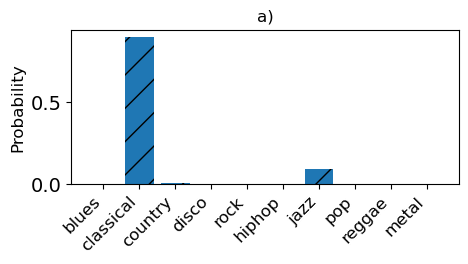

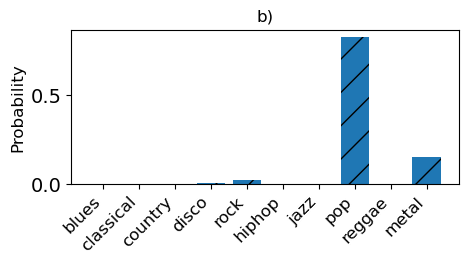

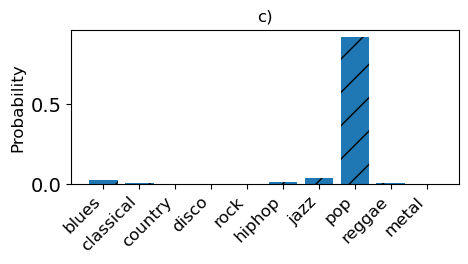

In [11]:
labels = list(name_dict.keys())
pattern = '/'

# Gráfico a)
plt.figure(figsize=(5,2))
bars = plt.bar(labels, moon_scores[0])
for bar in bars:
    bar.set_hatch(pattern)  # Aplica padrão de preenchimento
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.tick_params(axis='y', labelsize=14)
plt.title('a)', fontsize=12)
plt.show()

# Gráfico b)
plt.figure(figsize=(5,2))
bars = plt.bar(labels, doom_scores[0])
for bar in bars:
    bar.set_hatch(pattern)  # Aplica padrão de preenchimento
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.tick_params(axis='y', labelsize=14)
plt.title('b)', fontsize=12)
plt.show()

# Gráfico c)
plt.figure(figsize=(5,2))
bars = plt.bar(labels, doom_full_scores[0])
for bar in bars:
    bar.set_hatch(pattern)  # Aplica padrão de preenchimento
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.tick_params(axis='y', labelsize=14)
plt.title('c)', fontsize=12)
plt.show()

Vector of predicted probabilities returned by CNN model for: Moonlight Sonata (1st movement) and Doom Eternal (10s), respectively

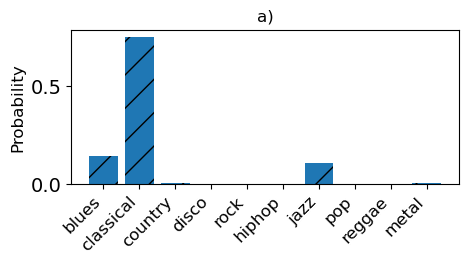

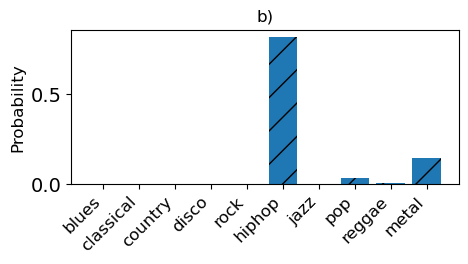

In [12]:
labels = list(name_dict.keys())
pattern = '/'

# Gráfico a)
plt.figure(figsize=(5,2))
bars = plt.bar(labels, moon_scores2[0])
for bar in bars:
    bar.set_hatch(pattern)  # Aplica padrão de preenchimento
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.tick_params(axis='y', labelsize=14)
plt.title('a)', fontsize=12)
plt.show()

# Gráfico b)
plt.figure(figsize=(5,2))
bars = plt.bar(labels, doom_scores2[0])
for bar in bars:
    bar.set_hatch(pattern)  # Aplica padrão de preenchimento
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.tick_params(axis='y', labelsize=14)
plt.title('b)', fontsize=12)
plt.show()

Animation using both models to classify using a sliding window of 10s. For this we choose the Doom Eternal (full) audio track

In [ ]:
pred_vec_vkernel = []
pred_vec_bicrnn = []
for i in range(50):
    pred_vec_vkernel.append(model.predict(doom_full[ i*110000 : (i+2)*110000].reshape(1,-1,1)))
    pred_vec_bicrnn.append(model4.predict(doom_full[ i*110000 : (i+2)*110000].reshape(1,-1,1)))

In [ ]:
def plot_graphs(i):
    labels = list(name_dict.keys())
    pattern = '/'

    # Gráfico a)
    plt.figure(figsize=(6,2))
    bars = plt.bar(labels, pred_vec_vkernel[i][0])
    for bar in bars:
        bar.set_hatch(pattern)  # Aplica padrão de preenchimento
    plt.xticks(rotation=45, ha='right', fontsize=15)
    plt.ylabel('Probability', fontsize=20)
    plt.tick_params(axis='y', labelsize=14)
    plt.title('v_kernel_ps', fontsize=20)
    plt.ylim(0,1)
    plt.text(x = 7, y = 1.2, s = f'Time window: {i*5//60}m:{(i*5)%60}s to {(i+2)*5//60}m:{((i+2)*5)%60}s', fontsize = 14)
    plt.show()

    # Gráfico b)
    plt.figure(figsize=(6,2))
    bars = plt.bar(labels, pred_vec_bicrnn[i][0])
    for bar in bars:
        bar.set_hatch(pattern)  # Aplica padrão de preenchimento
    plt.xticks(rotation=45, ha='right', fontsize=15)
    plt.ylabel('Probability', fontsize=20)
    plt.tick_params(axis='y', labelsize=14)
    plt.title('BICRNN_ps', fontsize=20)
    plt.ylim(0,1)
    plt.show()

slider = interactive(plot_graphs, i=(0, 48))

display(slider)
